In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

# from sklearn.model_selection import train_test_split, cross_val_score
# from sklearn.linear_model import LinearRegression
# from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.cluster import KMeans

In [2]:
df = pd.read_csv('ProjectDataset.csv')
df.head(10)

,state,playerid,wagerid,event_start,placed_date,settled_date,sportname,bet_type,result,net_stake,ggr,legresult,decimalodds
0,State1,3.065121e+07,1.693004e+06,2021-04-28 00:30:00+00,2021-04-27,2021-04-27,nhl,straight,won,6.64,-4.96,won,1.74627
1,State1,2.223717e+07,1.696371e+06,2021-04-28 01:45:00+00,2021-04-27,2021-04-27,nba,parlay,lost,5.00,5.00,won,1.78125
2,State1,2.223717e+07,1.696371e+06,2021-04-28 01:45:00+00,2021-04-27,2021-04-27,nba,parlay,lost,5.00,5.00,lost,1.86207
3,State1,2.223717e+07,1.696371e+06,2021-04-28 01:45:00+00,2021-04-27,2021-04-27,nba,parlay,lost,5.00,5.00,lost,1.74627
4,State1,2.223717e+07,1.696371e+06,2021-04-28 01:45:00+00,2021-04-27,2021-04-27,nba,parlay,lost,5.00,5.00,lost,1.78125
5,State1,4.682365e+06,1.696652e+06,2021-04-27 23:21:00+00,2021-04-27,2021-04-27,mlb,straight,won,5.00,-2.87,won,1.57471
6,State1,4.682365e+06,1.696680e+06,2021-04-27 23:21:00+00,2021-04-27,2021-04-27,mlb,straight,won,5.00,-1.28,won,1.25641
7,State1,2.224106e+07,1.701957e+06,2021-04-27 19:00:00+00,2021-04-27,2021-04-27,champions league,straight,lost,5.00,5.00,lost,2.50000
8,State1,2.549285e+07,1.702804e+06,2021-04-28 01:45:00+00,2021-04-27,2021-04-27,nba,straight,lost,10.00,10.00,lost,1.71429
9,State1,2.549285e+07,1.702826e+06,2021-04-28 01:45:00+00,2021-04-27,2021-04-27,nba,straight,lost,10.00,10.00,lost,1.96154


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4174500 entries, 0 to 4174499
Data columns (total 13 columns):
 #   Column        Dtype  
---  ------        -----  
 0   state         object 
 1   playerid      float64
 2   wagerid       float64
 3   event_start   object 
 4   placed_date   object 
 5   settled_date  object 
 6   sportname     object 
 7   bet_type      object 
 8   result        object 
 9   net_stake     float64
 10  ggr           float64
 11  legresult     object 
 12  decimalodds   float64
dtypes: float64(5), object(8)
memory usage: 414.0+ MB


In [19]:
# converting placed_date and settled_date to datetime objects for convenience later

df['placed_date'] = pd.to_datetime(df['placed_date'])
df['settled_date'] = pd.to_datetime(df['settled_date'])

In [4]:
df.nunique()

state                 3
playerid          36387
wagerid         2402300
event_start       11991
placed_date         366
settled_date        367
sportname             7
bet_type              2
result                2
net_stake         31701
ggr               96979
legresult             5
decimalodds       18694
dtype: int64

In [5]:
df.describe()

,playerid,wagerid,net_stake,ggr,decimalodds
count,4.174500e+06,4.174500e+06,4.174500e+06,4.174500e+06,4.172028e+06
mean,2.273927e+07,4.754173e+07,2.361655e+01,2.451643e+00,3.984459e+00
std,1.033895e+07,3.675171e+07,8.189246e+01,8.532259e+01,1.602930e+01
min,5.971640e+04,1.691622e+06,4.001000e+00,-2.100000e+04,1.000100e+00
25%,1.750210e+07,2.296253e+07,5.000000e+00,0.000000e+00,1.649350e+00
50%,2.379874e+07,3.859404e+07,1.000000e+01,6.000000e+00,1.909090e+00
75%,3.064089e+07,5.861577e+07,2.000000e+01,1.200000e+01,2.200000e+00
max,4.297671e+07,1.779192e+08,1.967200e+04,1.967200e+04,5.001000e+03


In [23]:
# should i convert playerid and wagerid to string objects?

In [12]:
df['sportname'].value_counts(normalize=True)

nfl                   0.329091
nba                   0.325649
college basketball    0.119011
mlb                   0.113918
college football      0.062496
nhl                   0.044950
champions league      0.004885
Name: sportname, dtype: float64

<AxesSubplot:>

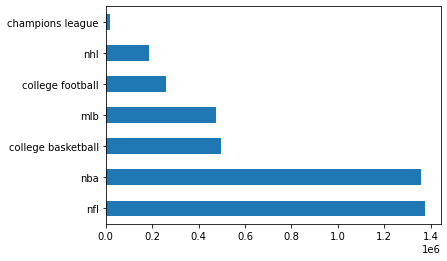

In [11]:
df['sportname'].value_counts().plot(kind='barh')

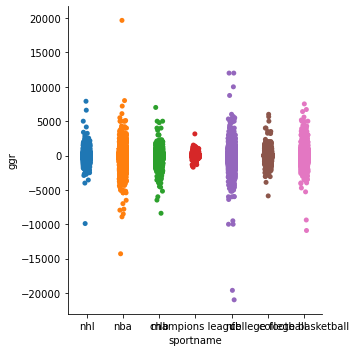

In [17]:
sns.catplot(data=df, x="sportname", y="ggr")

<AxesSubplot:xlabel='placed_date', ylabel='net_stake'>

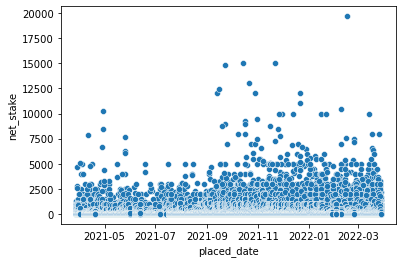

In [20]:
sns.catplot(data=df, x='placed_date', y='net_stake')

In [24]:
df.groupby(['sportname'])['net_stake', 'ggr', 'decimalodds'].mean()

/var/folders/q4/3qhdj_kd6_56b822k50hsf780000gn/T/ipykernel_12259/391136239.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby(['sportname'])['net_stake', 'ggr', 'decimalodds'].mean()


,net_stake,ggr,decimalodds
sportname,,,
champions league,20.681601,3.639906,3.536511
college basketball,27.771355,1.637004,2.322310
college football,30.434304,2.369812,2.297570
mlb,24.318649,2.559210,2.608363
nba,21.312787,2.407713,3.210320
nfl,23.111105,2.742356,6.329629
nhl,22.067333,2.510377,2.692234


In [25]:
df.groupby(['sportname'])['net_stake', 'ggr', 'decimalodds'].min()

/var/folders/q4/3qhdj_kd6_56b822k50hsf780000gn/T/ipykernel_12259/74133145.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby(['sportname'])['net_stake', 'ggr', 'decimalodds'].min()


,net_stake,ggr,decimalodds
sportname,,,
champions league,4.037272,-1696.97,1.0001
college basketball,4.002000,-10909.09,1.0010
college football,4.002000,-5875.00,1.0010
mlb,4.001000,-8400.00,1.0001
nba,4.002000,-14297.50,1.0001
nfl,4.002000,-21000.00,1.0010
nhl,4.002000,-9899.44,1.0020


In [26]:
df.groupby(['sportname'])['net_stake', 'ggr', 'decimalodds'].max()

/var/folders/q4/3qhdj_kd6_56b822k50hsf780000gn/T/ipykernel_12259/496604297.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby(['sportname'])['net_stake', 'ggr', 'decimalodds'].max()


,net_stake,ggr,decimalodds
sportname,,,
champions league,4850.0,3150.00,1001.0
college basketball,12000.0,7513.93,501.0
college football,10000.0,6000.00,321.0
mlb,12400.0,7000.00,5001.0
nba,19672.0,19672.00,601.0
nfl,15000.0,12000.00,1001.0
nhl,7900.0,7900.00,301.0


In [32]:
corr_cols = ['net_stake', 'ggr', 'decimalodds']
df[corr_cols].corr().style.background_gradient(cmap='coolwarm')

,net_stake,ggr,decimalodds
net_stake,1.000000,0.046231,-0.017033
ggr,0.046231,1.000000,0.002769
decimalodds,-0.017033,0.002769,1.000000


### Attempt at KMeans clustering for user segmentation

In [43]:
clustering1 = KMeans(n_clusters=4)

In [44]:
clustering1.fit(df[['net_stake']])

KMeans(n_clusters=4)

In [45]:
clustering1.labels_

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

In [46]:
df['net_stake cluster'] = clustering1.labels_
df.head()

,state,playerid,wagerid,event_start,placed_date,settled_date,sportname,bet_type,result,net_stake,ggr,legresult,decimalodds,net_stake cluster
0,State1,3.065121e+07,1.693004e+06,2021-04-28 00:30:00+00,2021-04-27,2021-04-27,nhl,straight,won,6.64,-4.96,won,1.74627,0
1,State1,2.223717e+07,1.696371e+06,2021-04-28 01:45:00+00,2021-04-27,2021-04-27,nba,parlay,lost,5.00,5.00,won,1.78125,0
2,State1,2.223717e+07,1.696371e+06,2021-04-28 01:45:00+00,2021-04-27,2021-04-27,nba,parlay,lost,5.00,5.00,lost,1.86207,0
3,State1,2.223717e+07,1.696371e+06,2021-04-28 01:45:00+00,2021-04-27,2021-04-27,nba,parlay,lost,5.00,5.00,lost,1.74627,0
4,State1,2.223717e+07,1.696371e+06,2021-04-28 01:45:00+00,2021-04-27,2021-04-27,nba,parlay,lost,5.00,5.00,lost,1.78125,0


In [47]:
df['net_stake cluster'].value_counts()

0    4100412
3      68101
1       5734
2        253
Name: net_stake cluster, dtype: int64

In [41]:
inertia_scores = []
for i in range(1,15):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(df[['net_stake']])
    inertia_scores.append(kmeans.inertia_)

In [49]:
inertia_scores

[27995756518.286972,
 15520599366.629433,
 9429911399.508099,
 6089990456.387669,
 4209785557.0198555,
 2993291205.2808075,
 2229142891.3496284,
 1621850719.9175029,
 1312279541.2868893,
 1051646168.6611164,
 874242832.7183039,
 773516081.640336,
 681756138.9029303,
 545736036.8367519]

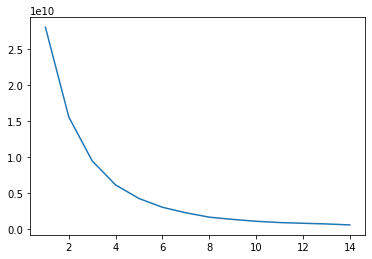

In [42]:
plt.plot(range(1,15), inertia_scores)